### KUMUD KUMAR
### PGP-AIML OCT 21A

#### PART A 

**DOMAIN**: Digital content and entertainment industry

**CONTEXT**:
The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

**DATA DESCRIPTION:**
The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, 0 does not stand for a specific word, but instead is used to encode any unknown word.

**PROJECT OBJECTIVE:**
To Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.


#### 1. Import and analyse the data set. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random, re

from tensorflow import keras
import numpy as np
import json
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, TextVectorization, LSTM, Bidirectional, Embedding
import gc
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from itertools import islice

#!pip install textpreprocess
from textpreprocess import *

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

from keras_preprocessing.sequence import pad_sequences
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense, Embedding, LSTM, MaxPooling1D, Conv1D, Bidirectional, GlobalMaxPool1D
from keras.constraints import max_norm, unit_norm
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.initializers import Constant

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import nltk

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 10_000)

#### 2.  Perform relevant sequence adding on the data 

In [4]:
x_train_padded = []
x_test_padded = []

for train_sample, test_sample in zip(x_train, x_test):
    if len(train_sample) < 20:
        x_train_padded.append(
            train_sample + ( ["0"] * (20 - len(train_sample) ) )
        )
    else:
        x_train_padded.append(
            train_sample[ : 20 ]
        )
    if len(test_sample) < 20:
        x_test_padded.append(
            test_sample + ( ["0"] * (20 - len(test_sample) ) )
        )
    else:
        x_test_padded.append(
            test_sample[ : 20 ]
        )


In [5]:
x_train_padded = np.asarray(x_train_padded, dtype = np.int32)
x_test_padded = np.asarray(x_test_padded, dtype = np.int32)

### 3. data analysis 

In [6]:
print(x_train_padded.shape)
print(x_test_padded.shape) 
print(y_train.shape)
print(y_test.shape)


(25000, 20)
(25000, 20)
(25000,)
(25000,)


In [7]:
print(f"{x_train_padded[0]} \n\n ")
print()
print("Label for train[0] is", y_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25] 

 

Label for train[0] is 1


### 4. Decode the feature value to get original sentence

In [8]:
vocab = keras.datasets.imdb.get_word_index()
vocab["0"] = 0

In [9]:
index_to_word = { index : word for word, index in vocab.items() }

In [10]:
reviews = []

for sample in x_train_padded[ : 20 ] :
    reviews.append(" ".join([index_to_word.get(index - 3, "0") for index in sample]))

In [11]:
for review, sentiment in zip(reviews, y_train[ : 20 ] ) :
    print(f"{review :150}  {sentiment} " )

0 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you                           1 
0 big hair big boobs bad music and a giant safety pin these are the words to best describe this                                                         0 
0 this has to be one of the worst films of the 1990s when my friends i were watching this                                                               0 
0 the 0 0 at storytelling the traditional sort many years after the event i can still see in my                                                         1 
0 worst mistake of my life br br i picked this movie up at target for 5 because i figured                                                               0 
0 begins better than it ends funny that the russian submarine crew 0 all other actors it's like those scenes                                            0 
0 lavish production values and solid performances in this straightforw

### 5.  Design, train, tune and test a sequential model

In [12]:
def vectorize_data(data, vocab_size = 10_000):
    vectorized_data = np.zeros(shape = (len(data), vocab_size,))
    for index, sample in enumerate(data):
        for word_index in sample:
            #print(index, word_index)
            if word_index != "?":
                vectorized_data[int(index), int(word_index)] = 1
    return vectorized_data

In [13]:
x_train_padded = vectorize_data(x_train_padded)
x_test_padded = vectorize_data(x_test_padded)

In [14]:
x_train_padded.shape, x_test_padded.shape

((25000, 10000), (25000, 10000))

In [15]:
# sequential model
model = keras.Sequential()

#adding input layer
model.add(keras.Input(shape = 10_000))

# dense layer
model.add(Dense(16, activation = "relu"))
model.add(Dense(16, activation = "relu"))

# batchnormalization 
model.add(BatchNormalization())

# adding dense layer 2
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(BatchNormalization())

# output layer
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                        

In [16]:
# model compilation

model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [17]:
# model history 

history = model.fit(
    x = x_train_padded,
    y = y_train,
    batch_size = 100,
    epochs = 20,
    validation_split = 0.3,
    callbacks = [ keras.callbacks.ReduceLROnPlateau(patience = 3), keras.callbacks.ModelCheckpoint(filepath = "./best.keras")]
)

Epoch 1/20
175/175 [==============================] - 28s 126ms/step - loss: 0.6792 - accuracy: 0.5977 - val_loss: 0.6748 - val_accuracy: 0.6215 - lr: 0.0010
Epoch 2/20
175/175 [==============================] - 2s 9ms/step - loss: 0.5373 - accuracy: 0.7303 - val_loss: 0.6106 - val_accuracy: 0.6843 - lr: 0.0010
Epoch 3/20
175/175 [==============================] - 2s 9ms/step - loss: 0.4551 - accuracy: 0.7835 - val_loss: 0.5663 - val_accuracy: 0.6989 - lr: 0.0010
Epoch 4/20
175/175 [==============================] - 2s 10ms/step - loss: 0.3861 - accuracy: 0.8264 - val_loss: 0.5983 - val_accuracy: 0.6951 - lr: 0.0010
Epoch 5/20
175/175 [==============================] - 2s 9ms/step - loss: 0.3257 - accuracy: 0.8567 - val_loss: 0.6734 - val_accuracy: 0.6961 - lr: 0.0010
Epoch 6/20
175/175 [==============================] - 2s 9ms/step - loss: 0.2708 - accuracy: 0.8862 - val_loss: 0.7068 - val_accuracy: 0.6829 - lr: 0.0010
Epoch 7/20
175/175 [==============================] - 2s 10ms/step

In [18]:
# model evaluation
model.evaluate(x_test_padded, y_test)

782/782 [==============================] - 12s 3ms/step - loss: 0.8204 - accuracy: 0.6723


[0.8203593492507935, 0.6723200082778931]

#### We can refine this model by making more denser layers and using dropout  

In [19]:
# sequential model
model2 = keras.Sequential()

#adding input layer
model2.add(keras.Input(shape = 10_000))

# dense layer
model2.add(Dense(256, activation = "relu"))
model2.add(Dense(128, activation = "relu"))

# dropout layer
model.add(Dropout(0.2))

# adding dense layer 2
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(16, activation = "relu"))

model.add(Dropout(0.2))

# output layer
model2.add(Dense(1, activation = "sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560256   
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,602,465
Trainable params: 2,602,465
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [21]:
history = model2.fit(
    x = x_train_padded,
    y = y_train,
    batch_size = 100,
    epochs = 20,
    validation_split = 0.3,
    callbacks = [ keras.callbacks.ReduceLROnPlateau(patience = 3), keras.callbacks.ModelCheckpoint(filepath = "./best.keras")]
)

Epoch 1/20
175/175 [==============================] - 18s 77ms/step - loss: 0.5989 - accuracy: 0.6678 - val_loss: 0.5525 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/20
175/175 [==============================] - 10s 54ms/step - loss: 0.4391 - accuracy: 0.7955 - val_loss: 0.5592 - val_accuracy: 0.7151 - lr: 0.0010
Epoch 3/20
175/175 [==============================] - 11s 61ms/step - loss: 0.2675 - accuracy: 0.8910 - val_loss: 0.6640 - val_accuracy: 0.7079 - lr: 0.0010
Epoch 4/20
175/175 [==============================] - 10s 57ms/step - loss: 0.1166 - accuracy: 0.9622 - val_loss: 1.0865 - val_accuracy: 0.7001 - lr: 0.0010
Epoch 5/20
175/175 [==============================] - 9s 51ms/step - loss: 0.0290 - accuracy: 0.9933 - val_loss: 1.1975 - val_accuracy: 0.7009 - lr: 1.0000e-04
Epoch 6/20
175/175 [==============================] - 8s 48ms/step - loss: 0.0177 - accuracy: 0.9959 - val_loss: 1.3286 - val_accuracy: 0.6987 - lr: 1.0000e-04
Epoch 7/20
175/175 [==============================] 

In [22]:
model2.evaluate(x_test_padded, y_test)

782/782 [==============================] - 16s 5ms/step - loss: 1.6504 - accuracy: 0.6766


[1.6503844261169434, 0.6765999794006348]

#### Conclusion:
 There is slight increase in accuracy but icrease in loss after using more denser layers and droput layers. 

### 6. Use the designed model to print the prediction on any one sample 

In [23]:
pred = model2.predict(x_train_padded[np.newaxis, 25])
print(" ".join(index_to_word[index] for index in x_train[0]), f"\npredicted : {pred.item()} \t real : {y_test[25]}")

1/1 [==============================] - 14s 14s/step
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart 

### Part B - 30 Marks

**DOMAIN: Social media analytics**

### CONTEXT:
Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

**DATA DESCRIPTION:**
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of inding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

**Content:** Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0

**headline:** the headline of the news article

**article_link:** link to the original news article. Useful in collecting supplementary data

Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

**PROJECT OBJECTIVE:**
Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments

### 1. Read data 

In [24]:
med_data = pd.read_json('C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/NLP PROJECT 2/Sarcasm_Headlines_Dataset.json', lines = True)
print(f'MediaData has {med_data.shape[0]} rows and {med_data.shape[1]} columns. Here are the few rows of the data...')
display(med_data.head())

MediaData has 28619 rows and 3 columns. Here are the few rows of the data...


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [25]:
# shape of data
med_data.shape

(28619, 3)

In [26]:
# info of dataset
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [27]:
# checking for null values

med_data.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

------------------------------------------------------------
Value Counts for `is_sarcastic` label
------------------------------------------------------------
Is Sarcastic count: 13634 i.e. 48.0%
Isn't Sarcastic count: 14985 i.e. 52.0%
------------------------------------------------------------
Distributon of `is_sarcastic` label
------------------------------------------------------------


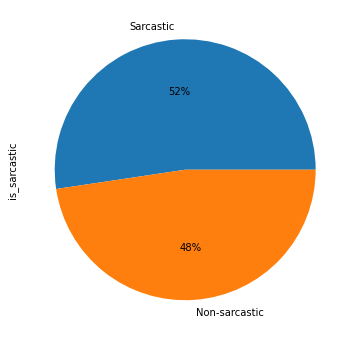

In [28]:
print('--'*30)
print('Value Counts for `is_sarcastic` label'); print('--'*30)
print(f'Is Sarcastic count: {med_data[med_data.is_sarcastic == 1].shape[0]} i.e. {round(med_data[med_data.is_sarcastic == 1].shape[0]/med_data.shape[0]*100, 0)}%')
print(f'Isn\'t Sarcastic count: {med_data[med_data.is_sarcastic == 0].shape[0]} i.e. {round(med_data[med_data.is_sarcastic == 0].shape[0]/med_data.shape[0]*100, 0)}%')

print('--'*30)
print('Distributon of `is_sarcastic` label')
print('--'*30)
_ = med_data['is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))

------------------------------------------------------------
Checking 5 random headlines and labels from the data where the length of headline is > 100
------------------------------------------------------------
Headline: man silently eating personal pan pizza alone in corner of airport unaware this will be best part of 7-day vacation
label: 1

Headline: cackling julian assange disintegrates into lines of code as baffled authorities attempt to handcuff him
label: 1

Headline: nation clinging desperately to brief inspirational moment before being thrust back into raging election maelstrom
label: 1

Headline: bill & melinda gates foundation announces new $17 billion initiative to eradicate all 3rd-world mac users by 2040
label: 1

Headline: report: supplying police with high-powered military weapons to sharply reduce costs of shooting suspects multiple times
label: 1

------------------------------------------------------------
Distributon of label where the length of headline is > 100


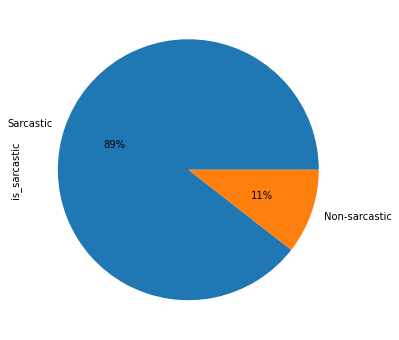

In [30]:
# Checking 5 random headlines and labels from the data where the length of headline is > 100
print('--'*30); print('Checking 5 random headlines and labels from the data where the length of headline is > 100'); print('--'*30)
indexes = list(med_data.loc[med_data['headline'].str.len() > 100, 'headline'].index)
rands = random.sample(indexes, 5)
headlines, labels = list(med_data.loc[rands, 'headline']), list(med_data.loc[rands, 'is_sarcastic'])

_ = [print(f'Headline: {head}\nlabel: {label}\n') for head, label in zip(headlines, labels)]

print('--'*30); print('Distributon of label where the length of headline is > 100'); print('--'*30)
_ = med_data.loc[indexes, 'is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))

#### Conclusion:

1. 52% of the data have sarcastic labels whereas 48% are non sarcastic.


2. No missing values present in the data



3. There ae digits and special characters in headlines


4. 89% of data where length of sentence (headlines) > 100 are sarcastic headlines

#### 2. Retain relevant columns 

In [31]:
#article_link not required

med_data.drop('article_link', axis = 1, inplace = True)

### Data Preprocessing 

**Few of the data pre-processing steps taken before applying model on the data**

1. Converting to lower case, avoid any capital cases

2. Converting apostrophe to the standard lexicons

3. Removing punctuations

4. Lemmatization 

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')



set_stopwords = set(stopwords.words("english"))

def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

med_data['clean_headline'] = med_data['headline'].apply(clean_txt)

[nltk_data] Downloading package stopwords to C:\Users\KUMUD
[nltk_data]     .LAPTOP-S0T3F3O8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
data_clean_len = med_data['clean_headline'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 205988 words to work with


In [34]:
med_data.head()

,is_sarcastic,headline,clean_headline
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nails congress falling short g...
2,0,eat your veggies: 9 deliciously different recipes,eat veggies deliciously different recipes
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close using word streaming...


### 3. Get length of each sentence 

In [35]:
# We need to pad the our sequences using the max length as different lines are of different length. 

print('--'*40); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 0 to 722.'); print('--'*40)
# Get length of each line
med_data['line_length'] = med_data['clean_headline'].str.len()

print('Minimum line length: {}'.format(med_data['line_length'].min()))
print('Maximum line length: {}'.format(med_data['line_length'].max()))
print()
print('Line with max length: {}'.format(med_data[med_data['line_length'] == med_data['line_length'].max()]['clean_headline'].values[0]))

--------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 0 to 722.
--------------------------------------------------------------------------------
Minimum line length: 0
Maximum line length: 722

Line with max length: hot wheels ranked number one toy rolling ramp knocking dominoes send marble funnel dropping onto teeter totter yanks string causing pulley system raise wooden block propelling series twine rollers unwind spring launching tennis ball across room inching tire slope hits power switch activating table fan blows toy ship nail attached across kiddie pool popping water balloon fills cup weighing lever forces basketball track nudging broomstick axis rotate allowing golf ball roll sideways coffee mug tumbles row hardcover books handle catches hook attached lever causes wooden mallet slam serving spoon catapulting small ball cup attached ribbon 

In [37]:
print('--'*40); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 1 to 107.'); print('--'*40)
# Get length of each line
med_data['nb_words'] = med_data['clean_headline'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(med_data['nb_words'].min()))
print('Maximum number of words: {}'.format(med_data['nb_words'].max()))
print()
print('Line with maximum number of words: {}'.format(med_data[med_data['nb_words'] == med_data['nb_words'].min()]['clean_headline'].values[0]))

--------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 1 to 107.
--------------------------------------------------------------------------------
Minimum number of words: 1
Maximum number of words: 107

Line with maximum number of words: live


In [38]:
med_data['headline'] = med_data['headline'].fillna('')
sarcastic_headlines = ' '.join(med_data.loc[med_data['is_sarcastic'] == 1, 'clean_headline'])
non_sarcastic_headlines = ' '.join(med_data.loc[med_data['is_sarcastic'] == 0, 'clean_headline'])

(-0.5, 399.5, 199.5, -0.5)

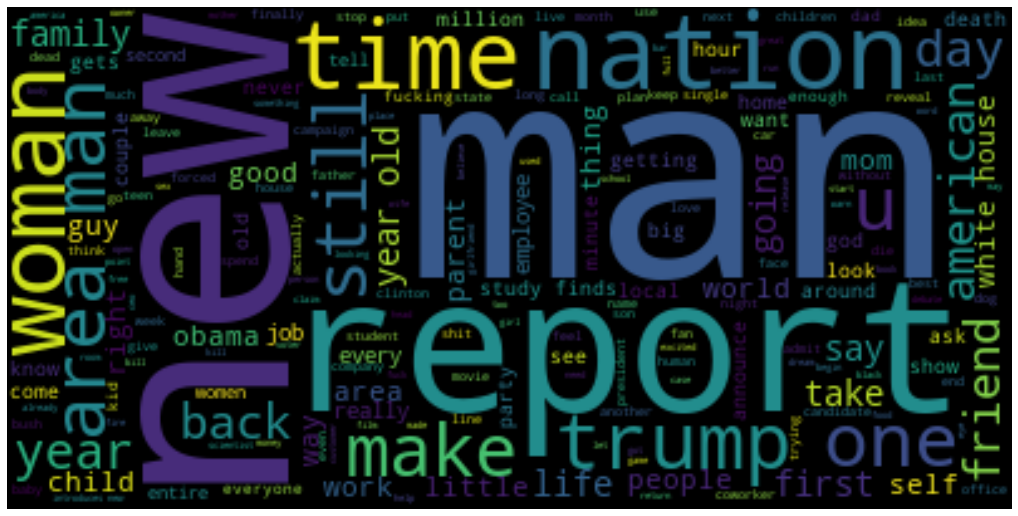

In [39]:
#Word cloud of Sarcastic Headlines

stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(sarcastic_headlines)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

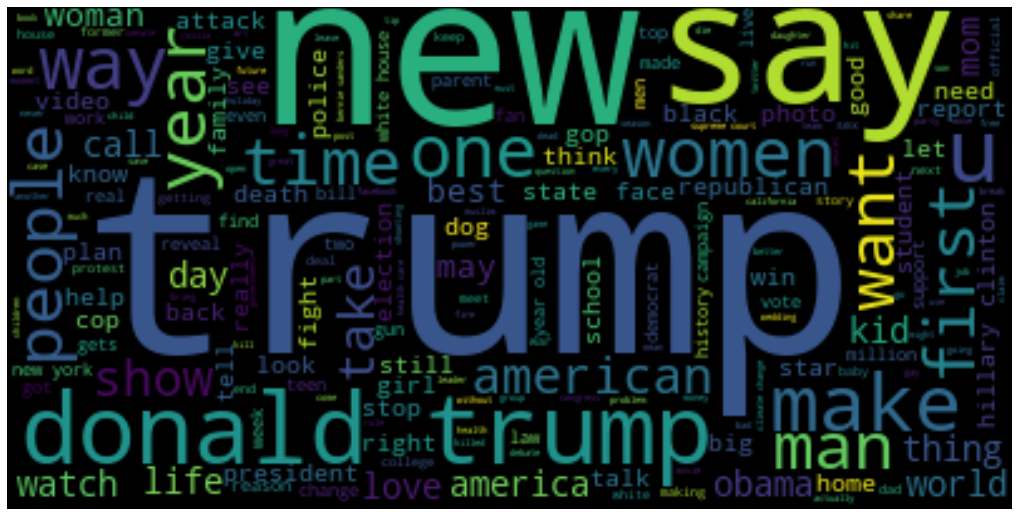

In [40]:
#Word cloud of non-Sarcastic Headlines


stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color = "black").generate(non_sarcastic_headlines)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [41]:
# summary of nb_words

print('Five point summary for number of words')
display(med_data['nb_words'].describe().round(0).astype(int)); 

Five point summary for number of words


count    28619
mean         7
std          2
min          1
25%          6
50%          7
75%          9
max        107
Name: nb_words, dtype: int32

#### 4. Defining parameters


In [42]:
max_features = 10000
maxlen = med_data['nb_words'].max() 
embedding_size = 200

#### 5. Get indices for words 

In [43]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(med_data['clean_headline']))

#### 6.  Create features and labels

In [44]:
X = tokenizer.texts_to_sequences(med_data['clean_headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(med_data['is_sarcastic'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[0]}\n\nLabel of the first headline: {y[0]}')

Number of Samples: 28619
Number of Labels: 28619

First headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  250 3026 6123 2013  527 1004]

Label of the first headline: 1


#### 7. Get vocabulary size

In [45]:
# Reserve padding (indexed zero)

w2i = tokenizer.word_index
vocab_size = len(w2i) + 1
print(f'Number of unique tokens: {vocab_size}')

Number of unique tokens: 25801


#### 8. Create a weight matrix using GloVe embeddings 

In [46]:
glove_file = 'C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/NLP PROJECT 2/glove.6B.200d.txt.zip'

In [47]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
    z.extractall()

In [48]:
# Get Glove Word Embeddings

EMBEDDING_FILE = 'C:/Users/KUMUD .LAPTOP-S0T3F3O8/Desktop/NLP/NLP PROJECT 2/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd

In [49]:
#creating a weight matrix

# Getting the minimum number of words
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

#### 9.Define and compile a Bidirectional LSTM model

In [50]:
# splitting data into train & test 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =20, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

------------------------------------------------------------ 
Number of rows in training dataset: 20033
Number of columns in training dataset: 107
Number of unique words in training dataset: 9934
------------------------------------------------------------ 
Number of rows in test dataset: 8586
Number of columns in test dataset: 107
Number of unique words in test dataset: 8763


In [51]:
# using sequential model

model_sar = Sequential()
# adding layers

model_sar.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
model_sar.add(Bidirectional(LSTM(128, return_sequences = True)))
model_sar.add(GlobalMaxPool1D())

# dropout layers
model_sar.add(Dropout(0.5, input_shape = (256,)))

# dense layers
model_sar.add(Dense(128, activation = 'relu'))
model_sar.add(Dropout(0.5, input_shape = (128,)))

model_sar.add(Dense(64, activation = 'relu'))
model_sar.add(Dropout(0.5, input_shape = (64,)))
model_sar.add(Dense(1, activation = 'sigmoid'))

# model compiling
model_sar.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model_sar.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 107, 200)          2000200   
                                                                 
 bidirectional (Bidirectiona  (None, 107, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

#### 10. Fitting the model & checking accuracy 

In [55]:
batch_size = 100
epochs = 5

model_sarc = model_sar.fit(x_train, y_train, epochs = epochs, validation_split = 0.3, batch_size = batch_size, verbose = 2, callbacks = callbacks)

Epoch 1/5

Epoch 1: val_loss improved from 0.44620 to 0.43430, saving model to sarcasm_detector.h5
141/141 - 80s - loss: 0.3581 - accuracy: 0.8439 - val_loss: 0.4343 - val_accuracy: 0.7992 - lr: 0.0010 - 80s/epoch - 565ms/step
Epoch 2/5

Epoch 2: val_loss did not improve from 0.43430
141/141 - 76s - loss: 0.3161 - accuracy: 0.8647 - val_loss: 0.4610 - val_accuracy: 0.7968 - lr: 0.0010 - 76s/epoch - 542ms/step
Epoch 3/5

Epoch 3: val_loss did not improve from 0.43430
141/141 - 79s - loss: 0.2931 - accuracy: 0.8774 - val_loss: 0.4384 - val_accuracy: 0.7995 - lr: 0.0010 - 79s/epoch - 561ms/step
Epoch 4/5

Epoch 4: val_loss did not improve from 0.43430
141/141 - 81s - loss: 0.2664 - accuracy: 0.8895 - val_loss: 0.4682 - val_accuracy: 0.7948 - lr: 0.0010 - 81s/epoch - 578ms/step
Epoch 5/5

Epoch 5: val_loss did not improve from 0.43430
141/141 - 82s - loss: 0.2241 - accuracy: 0.9083 - val_loss: 0.5640 - val_accuracy: 0.8007 - lr: 0.0010 - 82s/epoch - 585ms/step


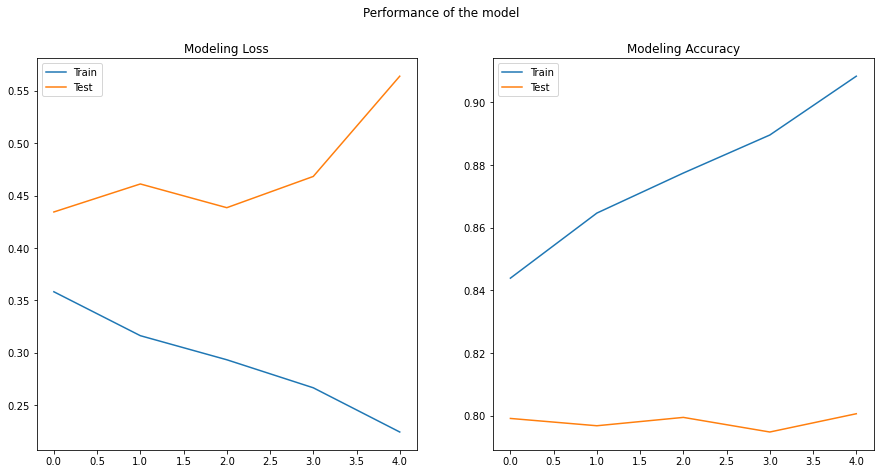

In [56]:
#plotting the loss and accuracy curve

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Performance of the model')

ax1.plot(model_sarc.history['loss'], label = 'Train')
ax1.plot(model_sarc.history['val_loss'], label = 'Test')
ax1.set_title('Modeling Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_sarc.history['accuracy'], label = 'Train')
ax2.plot(model_sarc.history['val_accuracy'], label = 'Test')
ax2.set_title('Modeling Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [58]:
# Evaluate the model
loss, accuracy = model_sar.evaluate(x_test, y_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracy * 100, 0)))

Overall Accuracy: 79.0


In [61]:
y_pred = (model_sar.predict(x_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

269/269 [==============================] - 21s 76ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4843
           1       0.74      0.81      0.78      3743

    accuracy                           0.79      8586
   macro avg       0.79      0.80      0.79      8586
weighted avg       0.80      0.79      0.80      8586



### Conclusion:

1. Testing accuracy for the glove model is 79% 

2. Number of epochs are less beacuse of the PC ram constraints, however accuracy can be increase by increasing number of epochs and batch size.

3. Classification report is also given . 